In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.impute import SimpleImputer

In [3]:
# importing dataset
data=pd.read_csv(r"C:\Users\DELL\Desktop\EMERGING WOMEN\AB_NYC_2019.csv\AB_NYC_2019.csv")

In [5]:
# getting information about datset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [44]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,48879.0,6.763013e+07,7.862070e+07,2438.00000,7.816856e+06,3.079133e+07,1.074344e+08,2.743213e+08
latitude,48879.0,4.072894e+01,5.452918e-02,40.49979,4.069009e+01,4.072308e+01,4.076311e+01,4.091306e+01
longitude,48879.0,-7.395217e+01,4.615997e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393628e+01,-7.371299e+01
price,48879.0,1.527224e+02,2.401868e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48879.0,7.011027e+00,2.001600e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48879.0,2.328120e+01,4.455615e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38837.0,1.373410e+00,1.680502e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48879.0,7.145891e+00,3.295774e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48879.0,1.127890e+02,1.316133e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [9]:
# We see that there are columns with null value- finding columns with null value
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [18]:
# To find % of missing values for each column
percent_missing=((data.isnull() | data.isna()).sum() * 100/ len(data)).round(2)

In [19]:
missing_value_df=pd.DataFrame({'column_name':data.columns,
                              'percent_missing': percent_missing})
print(missing_value_df)

                                                   column_name  \
id                                                          id   
name                                                      name   
host_id                                                host_id   
host_name                                            host_name   
neighbourhood_group                        neighbourhood_group   
neighbourhood                                    neighbourhood   
latitude                                              latitude   
longitude                                            longitude   
room_type                                            room_type   
price                                                    price   
minimum_nights                                  minimum_nights   
number_of_reviews                            number_of_reviews   
last_review                                        last_review   
reviews_per_month                            reviews_per_month   
calculated

In [27]:
# finding number of unique values for each column
data.nunique(dropna=False)

id                                48895
name                              47906
host_id                           37457
host_name                         11453
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1765
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [29]:
#Getting different unique values for column neighbourhood_group and room_type
(data['neighbourhood_group'].append(data['room_type'])).unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx',
       'Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [58]:
# Counting number of Unique values for each element in neighbourhood_group 
data['neighbourhood_group'].value_counts()

Manhattan        21652
Brooklyn         20098
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [30]:
# dropping irrelevant columns
data.drop(['id','host_name','last_review'],axis=1, inplace=True)

In [31]:
data.head(3)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


In [40]:
# Missing value treatment
# Note- dropna can be used to delete rows corresponding to null values
# fillna can be used to fill missing values with a particular values
# sklearn.impute.SimpleImputer can also be used for missing value treatment

data.dropna(subset=['name'], inplace=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48879 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48879 non-null  int64  
 2   neighbourhood_group             48879 non-null  object 
 3   neighbourhood                   48879 non-null  object 
 4   latitude                        48879 non-null  float64
 5   longitude                       48879 non-null  float64
 6   room_type                       48879 non-null  object 
 7   price                           48879 non-null  int64  
 8   minimum_nights                  48879 non-null  int64  
 9   number_of_reviews               48879 non-null  int64  
 10  reviews_per_month               38837 non-null  float64
 11  calculated_host_listings_count  48879 non-null  int64  
 12  availability_365                

In [42]:
print(data.shape)

(48879, 13)


In [66]:
# VISUALISATION and DATA EXPLORATION

#GETTING TOP 10 HOST LISTINGS

data.host_id.value_counts().head(10)

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [65]:
# verifying the above
data.calculated_host_listings_count.max()

327

In [5]:
#Removing duplicates
data.duplicated().sum()
data.drop_duplicates(inplace=True)

0

In [7]:
data.corr().style.background_gradient(cmap='coolwarm')
#No strong correlation except number_of_reviews vs reviews_per_month

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


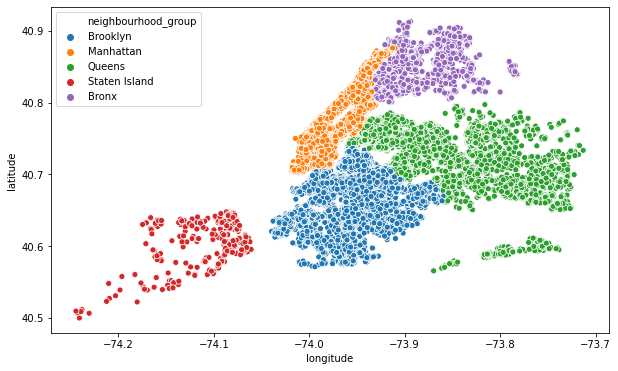

In [11]:
plt.figure(figsize=(10,6))
sb.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group)
plt.ioff()

In [13]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [14]:
from wordcloud import WordCloud

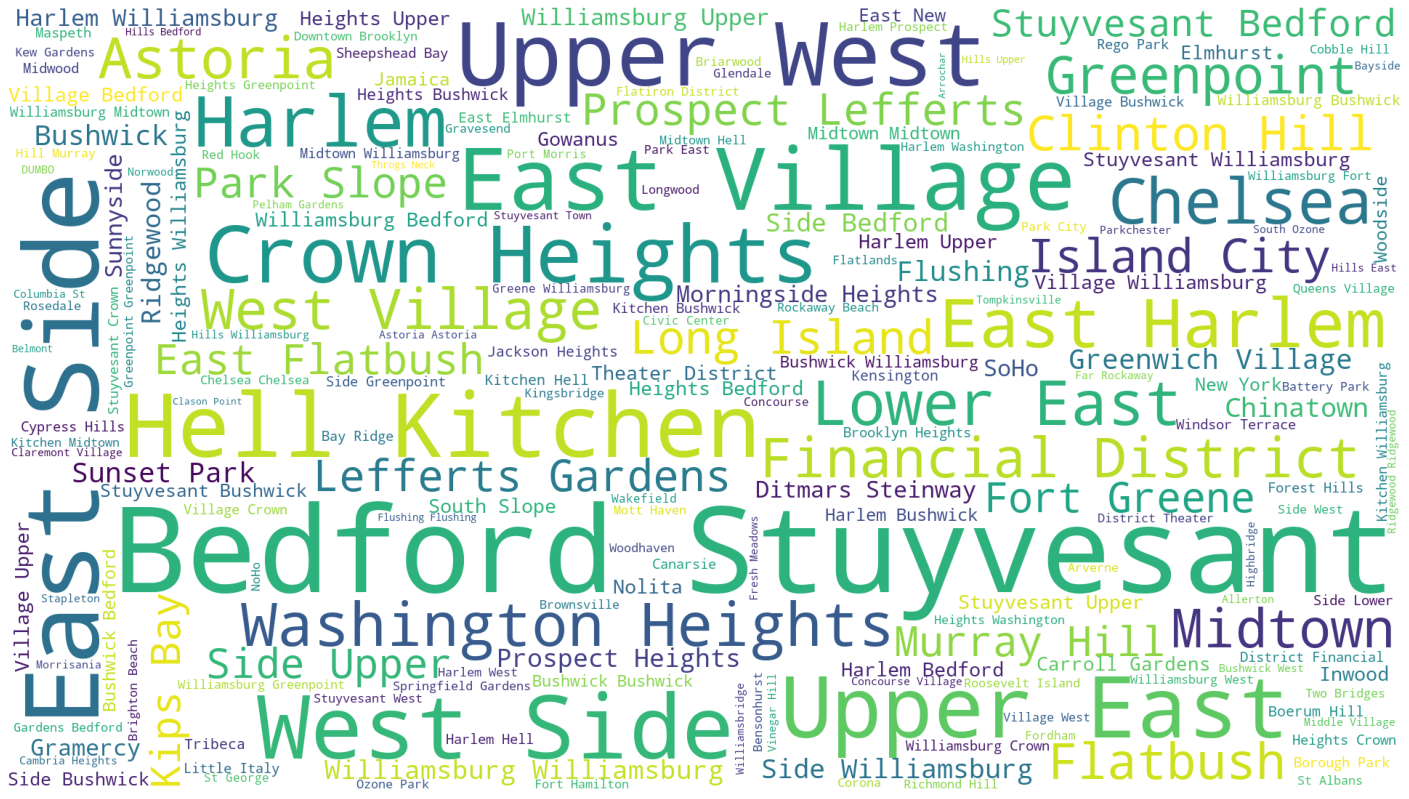

In [15]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()


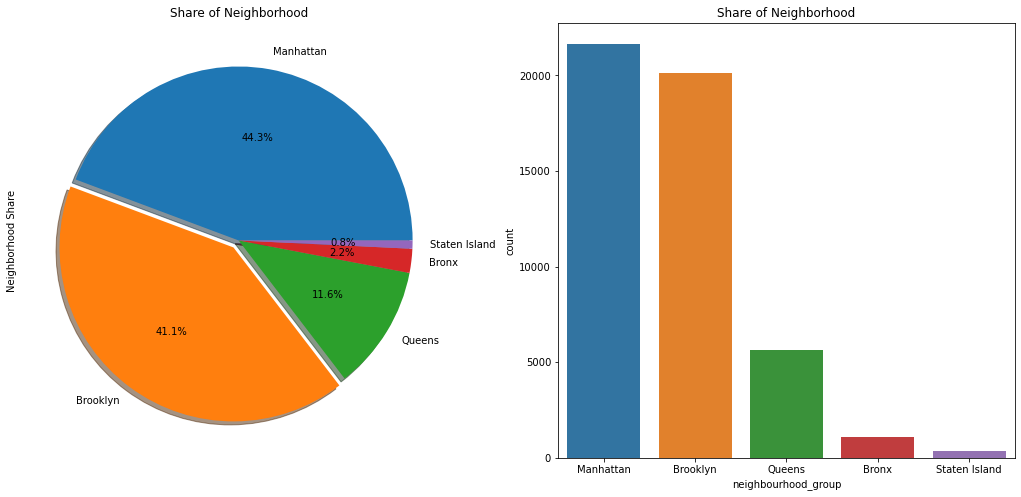

In [17]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['neighbourhood_group'].value_counts().plot.pie(explode=[0,0.05,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Neighborhood')
ax[0].set_ylabel('Neighborhood Share')
sb.countplot('neighbourhood_group',data=data,ax=ax[1],order=data['neighbourhood_group'].value_counts().index)
ax[1].set_title('Share of Neighborhood')
plt.show()

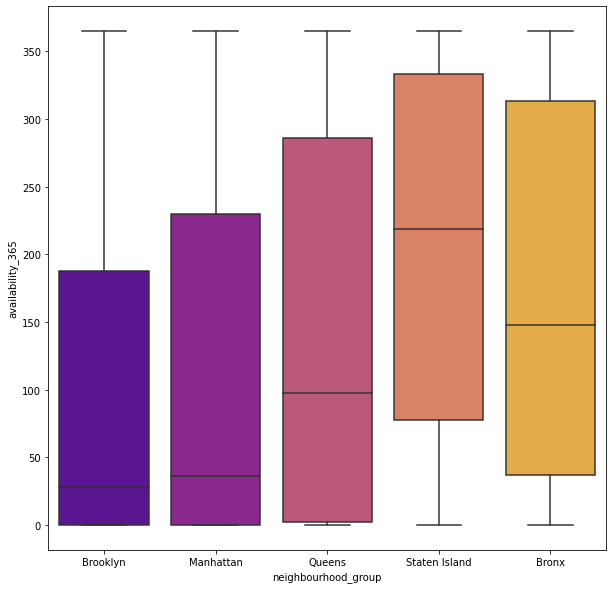

In [20]:
plt.figure(figsize=(10,10))
ax = sb.boxplot(data=data, x='neighbourhood_group',y='availability_365',palette='plasma')

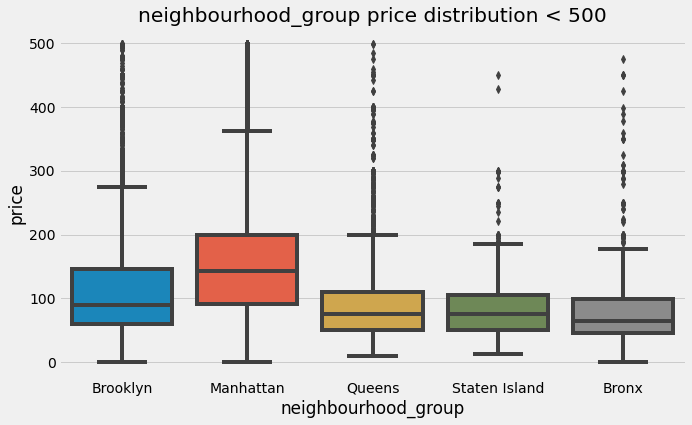

In [22]:
plt.style.use('fivethirtyeight')
ng = data[data.price <500]
plt.figure(figsize=(10,6))
sb.boxplot(y="price",x ='neighbourhood_group' ,data = ng)
plt.title("neighbourhood_group price distribution < 500")
plt.show()